In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HOUSING DATASET.csv")

In [3]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,WoodDeckSF,OpenPorchSF,TotalBsmtSF,FloorSF,SalePrice
0,60,65.0,8450,7,0,61,856,104678.0,208500
1,20,80.0,9600,6,298,0,1262,91381.0,181500
2,60,68.0,11250,7,0,42,920,112210.0,223500
3,70,60.0,9550,7,0,35,756,70378.0,140000
4,60,84.0,14260,8,192,84,1145,125572.5,250000


In [4]:
df["LotFrontage"].fillna("0",inplace = True)

In [5]:
X = df[["MSSubClass","LotFrontage","LotArea","OverallQual","WoodDeckSF","OpenPorchSF","FloorSF","TotalBsmtSF"]]
Y = df[["SalePrice"]]

<AxesSubplot:ylabel='Frequency'>

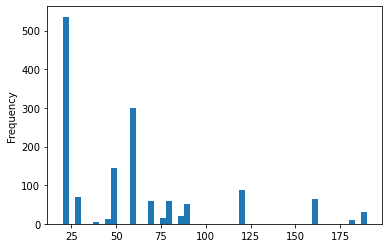

In [6]:
X["MSSubClass"].plot(kind = "hist",bins = 50)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [8]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,WoodDeckSF,OpenPorchSF,FloorSF,TotalBsmtSF
618,20,90.0,11694,9,0,108,158317.5,1822
870,20,60.0,6600,5,0,0,55197.0,894
92,30,80.0,13360,5,0,0,82188.0,876
817,20,0,13265,8,150,59,136284.0,1568
302,20,118.0,13704,7,468,81,103270.5,1541
...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,0,128,169126.0,1252
835,20,60.0,9600,4,290,0,64533.5,1067
1216,90,68.0,8930,6,0,0,56000.0,0
559,120,0,3196,7,143,20,117687.0,1374


In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [10]:
print(regressor.intercept_)
print(regressor.coef_)

[-1.74622983e-10]
[[ 2.10853101e-13  8.93177608e-13 -1.42775429e-16  1.69283993e-11
   3.49515857e-14  1.82523645e-14  2.00000000e+00 -1.00000000e+00]]


In [11]:
y_test

,SalePrice
529,200624
491,133000
459,110000
279,192000
655,88000
...,...
326,324000
440,555000
1387,136000
1323,82500


In [12]:
y_predict = regressor.predict(x_test)
df = pd.DataFrame({"Actual":y_test.values.flatten(),"predicted": y_predict.flatten()})
df

,Actual,predicted
0,200624,200624.0
1,133000,133000.0
2,110000,110000.0
3,192000,192000.0
4,88000,88000.0
...,...,...
287,324000,324000.0
288,555000,555000.0
289,136000,136000.0
290,82500,82500.0


In [13]:
y_train_predict = regressor.predict(x_train)

In [14]:
#Test dataset
from sklearn import metrics
print("Mean Absolute Error is ",metrics.mean_absolute_error(y_test,y_predict))
print("Mean squared Error is ",metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error is",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error is  3.388802176468993e-11
Mean squared Error is  2.3481957904190277e-21
Root Mean Squared Error is 4.8458186000087e-11


In [15]:
#training dataset
from sklearn import metrics
print("Mean Absolute Error is ",metrics.mean_absolute_error(y_train,y_train_predict))
print("Mean squared Error is ",metrics.mean_squared_error(y_train,y_train_predict))
print("Root Mean Squared Error is",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))

Mean Absolute Error is  3.279164458994996e-11
Mean squared Error is  1.908362329366174e-21
Root Mean Squared Error is 4.3684806619306144e-11
